## Занятие 4
## Математический анализ
## Анализ функции. Построение графика в matplotlib.pyplot
https://matplotlib.org
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
https://matplotlib.org/tutorials/text/annotations.html

In [1]:
# Импорт библиотеки matplotlib.pyplot обычно осуществляется так:
import matplotlib.pyplot as plt
import sympy
import numpy as np
from sympy import Symbol, symbols, S, solve, solveset, latex, fraction, Eq, simplify, Intersection
from sympy.calculus.util import continuous_domain

### Задание 1
Найти точки пересечения графика функции $f(x) = (x^2 + 3 x - 2)\log_2(3x+1)$ с осями координат, построить график и отметить точки пересечения.

#### Указание.
Определить функцию как в Примере 3, поскольку нужно будет использовать функцию  $\log_2(x)$ из каждого пакета sympy и numpy.
В numpy использовать $log2(x)$ для вычисления логарифма по основанию 2.

Сроить график только в пределах области определения функции. Точки пересечения с осью OX должны быть не только решениями соответствующего уравнения, но и принадлежать области определения функции.

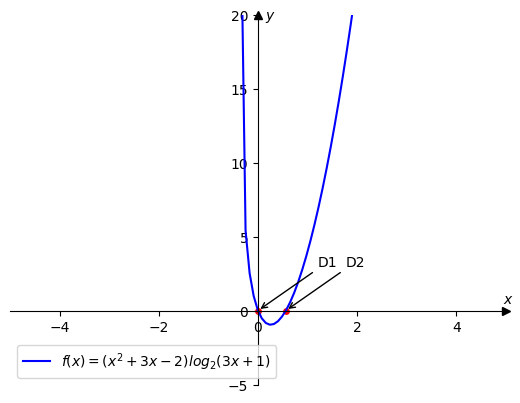

In [66]:
x, y = symbols('x y')

def f(x, lib = "sympy"):
  if lib == "sympy":
    lg = sympy.log(3 * x + 1, 2)
  elif lib == "numpy":
    lg = np.log2(3 * x + 1)
  else:
    print("Поддерживаются только sympy и numpy.\n")
    lg = sympy.log(3 * x + 1, 2)
  return (x**2 + 3*x - 2) * lg


# Функция для построение графика функции в привычной системе координат
# И отмечение на графке точек пересечения с осями координат
def Plot_Function(func, y_lim, x_lim):
  ax = plt.gca()

  # Создание списков координат точек пересечения графика функции с осями координат
  lst_x_dots_nchecked = solve(func)
  if lst_x_dots_nchecked.count(0) == 0:
    lst_x_dots_nchecked.append(0)
  cur_domain = continuous_domain(func, x, domain = S.Reals)
  lst_x_dots = [dot for dot in lst_x_dots_nchecked if len(Intersection(cur_domain, {dot})) > 0]
  lst_y_dots = [simplify(func.subs(x, dot)) for dot in lst_x_dots]

  X = np.linspace(-1/3 + 0.001 , 20, 250)

  # Построение графика
  ax.scatter(lst_x_dots, lst_y_dots, color = "red", s = 15)
  for i in range(len(lst_x_dots)):
    ax.annotate(f"D{i + 1}", xy = (lst_x_dots[i], lst_y_dots[i]), xycoords='data',
                xytext = (lst_x_dots[i] + 1.2, lst_y_dots[i] +3), textcoords = 'data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
  ax.plot(X, f(X, "numpy"), label =r"$f(x) = (x^{2} + 3x - 2)log_{2}(3x+1)$", color = "blue")

  # Устновка привычных осей координатной плоскости
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position(('data', 0))
  ax.spines['left'].set_position(('data', 0))
  ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
  ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
  ax.set(ylim = y_lim, xlim = x_lim)
  ax.set_xlabel(r"$x$")
  ax.set_ylabel(r"$y$", rotation = 0)
  ax.xaxis.set_label_coords(1.005, 0.250)
  ax.yaxis.set_label_coords(0.525, 0.975)
  ax.legend(loc = "lower left")


Plot_Function(f(x), (-5, 20), (-5, 5))

### Задание 2
Найти асимптоты графика функции $g(x) = \frac{35x^2 + 4x - 15}{3x - 2}$, построить график и асимптоты, в легенду графика включить формулы функции и асимптот, подписать оси 'x' и 'y'.

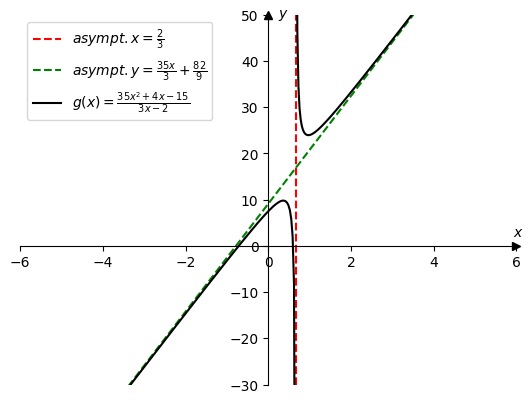

In [38]:
def g(x):
  return (35 * x**2 + 4*x - 15)/(3 * x - 2)

# Функция для нахождения наклонной ассимтоты
def Find_Oblqiq_Assi(func):
  lst_assi = []
  k_pos = sympy.limit(func/x , x, +sympy.oo)
  k_neg = sympy.limit(func/x, x, -sympy.oo)
  if (k_neg == k_pos):
    k = k_neg
    b = sympy.limit(func - k * x, x, sympy.oo)
    lst_assi.append(k*x + b)
  else:
    b_pos = sympy.limit(func - k_pos * x, x, +sympy.oo)
    b_neg = sympy.linit(func - k_neg * x, x, -sympy.oo)
    lst_assi.append(k_pos * x + b_pos)
    lst_assi.append(k_neg * x + b_neg)
  return lst_assi

# Функция для нахождения вертикальной ассмитоты
def Find_Vert_Assi(func):
  fnum, fdenum = sympy.fraction(func)
  lst_posib_vas = [*sympy.solveset(fdenum, x)]
  lst_vas = [dot for dot in lst_posib_vas if sympy.limit(func, x, dot) == sympy.oo]
  return lst_vas

ax = plt.gca()

# Построение графика
lst_olb = Find_Oblqiq_Assi(g(x))
lst_vec = Find_Vert_Assi(g(x))
for i in range(len(lst_vec)):
  ax.axvline(x = lst_vec[i], color = "red", linestyle = "--", label = r"$asympt. x =" + sympy.latex(lst_vec[i]) + r"$")
X_1 = np.linspace(-6, float(lst_vec[0] - 0.01), 200)
X_2 = np.linspace(float(lst_vec[0] + 0.01), 6, 200)
ax.plot([X_1[0], X_2[-1]], [lst_olb[0].subs({x : X_1[0]}), lst_olb[0].subs({x : X_2[-1]})],
        color = "green", linestyle = "--", label = r"$asympt.y = " + sympy.latex(lst_olb[0]) + r"$")
ax.plot(X_1, g(X_1), color = "black", label = r"$g(x) = \frac{35x^{2} + 4x - 15}{3x - 2}$")
ax.plot(X_2, g(X_2), color = "black")

# Редактура графика
x_lim = (-6, 6)
y_lim = (-30, 50)
ax.legend(loc = "best")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation = 0)
ax.xaxis.set_label_coords(1.005, 0.430)
ax.yaxis.set_label_coords(0.530, 0.980)


### Задание 3.
Описать в виде функции траекторию пули, выпущенной со скоростью $v_0$ под углом $\alpha$ к горизонту (по умолчанию $v_0 = 0$, $\alpha = \pi/2$)
$$
\left\{
\begin{matrix}
x=v_0t\cos\alpha\\
y=v_0t\sin\alpha-\frac{10t^2}{2}
\end{matrix}
\right.
$$
Аргументы функции $t$, $v_0$ и $\alpha$, результат - два выражения $x$ и $y$, в соответствии с формулами, приведенными выше.

Определить соответствующий набору параметров $v_0$ и $\alpha$ диапазон значений параметра времени $t$, учитывая, что пуля не должна провалиться сквозь землю.

Построить траектории при заданных значениях начальной скорости и угла на одном графике (($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2$, $\alpha = 1$)). Графики должны быть соответственно зеленого, красного и черного цвета.

Подписать оси $x$, $y$.

В легенде отразить значения параметров, например, $v_0 = 2,\ \alpha = \pi/6$.

Название графика - Траектории пуль.
#### Указание.
Использовать $\sin$ из numpy.

Решить уравнение $y = 0$ относительно $t$, пользуясь solve или solveset, чтобы с помощью найденного значения $t$ определить правую границу значений $x$.

#### Решение.
Определим функцию, зададим списком данные наборы параметров ($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2.5$, $\alpha = 1$) и найдем значение параметра $t$, при котором  $y = 0$. Затем подстановкой subs в t_interval найдем наибольшее значение $t$ и построим графики:

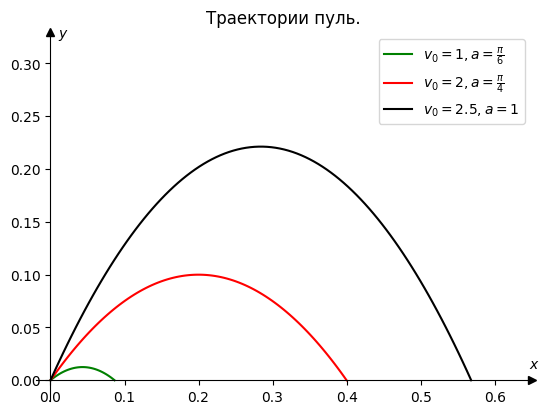

In [59]:
v0, t, a = symbols('v0 t a')
ax = plt.gca()
lst_param_val = [(1, np.pi/6, "green", S(sympy.pi)/6), (2, np.pi/4, "red", S(sympy.pi)/4), (2.5 , 1, "black", 1)]

# Функция задающая функцию траектории пути пули
def func(v_param = 0, a_param = np.pi/2):
  x_c = v_param * np.cos(a_param) * t
  y_c = v_param * np.sin(a_param) * t - (10 * t**2)/2
  return (x_c, y_c)

# Функция для нахождения границы параметра t
def GetTValRange(y_t):
  right_end = solve(y_t, t, domain = S.Reals)
  t_range = np.linspace(0, float(max(right_end)), 100)
  return t_range

# Функция для построения графика кривой с заданными параметрами.
def AddToPlot(v_val, a_val, cur_color, cur_label):
  x, y = func(v_val, a_val)
  t_range = GetTValRange(y)
  lst_x_dots = [x.subs({t : t_val}) for t_val in t_range]
  lst_y_dots = [y.subs({t : t_val}) for t_val in t_range]
  ax.plot(lst_x_dots, lst_y_dots, color = cur_color,
             label = cur_label)


for i in range(len(lst_param_val)):
  v_c, a_c, color_c, a_lab = lst_param_val[i]
  title_c = fr"$v_{0} = {latex(v_c)}, a = {latex(a_lab)}$"
  AddToPlot(v_c, a_c, color_c, title_c)

# Редактура графика
x_lim = (-0.02, 0.65)
y_lim = (-0.02, 0.33)
ax.legend(loc = "upper right")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$x$")
ax.set_title(r"Траектории пуль.")
ax.set_ylabel(r"$y$", rotation = 0)
ax.xaxis.set_label_coords(1.005, 0.120)
ax.yaxis.set_label_coords(0.055, 0.970)

### Индивидуальное задание.
Вариант $134$


Построить в одной координатной плоскости графики функций $$f(x) = - \frac{3 \cos{\left(\frac{4 \sin{\left(\frac{3 x}{2} \right)}}{3} \right)}}{2}$$ $$g(x) = \frac{3 \left(\frac{5}{4}\right)^{x} \cos{\left(x \right)}}{4}$$ на отрезке $\left[- e, \  3 e\right]$, $f(x)$ желтая линия из точек, $g(x)$ черная пунктирная линия. Отметки на горизонтальной оси от $- e$ до $3 e$ с шагом $e$, отметки подписать формулами как в Примере 3. По вертикальной оси отметки $0$, $1$, $2$.


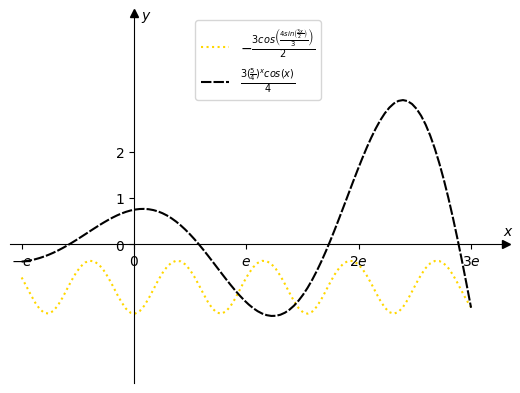

In [51]:
def f(x):
  return simplify(-3 * np.cos(4 * np.sin(3 * x/2)/3)/2)

def g(x):
  return simplify((3 * (5/4)**x * np.cos(x))/4)


ax = plt.gca()

x_range = np.linspace(-np.e, np.e * 3, 100)
ax.plot(x_range, f(x_range), color = "#FFD700", linestyle = "dotted", label = r"$- \frac{3cos\left(\frac{4sin\left(\frac{3x}{2}\right)}{3}\right)}{2}$")
ax.plot(x_range, g(x_range), color = "black", linestyle = (0, (5, 1)), label = r"$\frac{3(\frac{5}{4})^{x}cos(x)}{4}$")


x_lim = (-3, 9)
y_lim = (-3, 5)
ax.legend(loc = "upper center")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation = 0)
ax.set_xticks([np.e * i for i in range(-1, 4)])
ax.set_xticklabels([fr"${latex(sympy.E * i)}$" for i in range(-1, 4)])
ax.set_yticks([i for i in range(0, 3)])
ax.xaxis.set_label_coords(1.005, 0.430)
ax.yaxis.set_label_coords(0.275, 0.970)